# Importing STD libraries

In [1]:
import sklearn
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
from sklearn.model_selection import train_test_split
import numpy
import seaborn as sns

# load the dataset

In [2]:
# Load dataset
def load_data(path):
    data = pd.read_csv(path)
    return data

In [3]:
path_df = "../input/Tweets.csv"
Tweet = load_data(path_df)
Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada)
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada)
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada)
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada)
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada)


In [4]:
print('Dataset size:',Tweet.shape)

Dataset size: (14640, 15)


In [5]:
print('Columns are:',Tweet.columns)

Columns are: Index(['tweet_id', 'airline_sentiment', 'airline_sentiment_confidence',
       'negativereason', 'negativereason_confidence', 'airline',
       'airline_sentiment_gold', 'name', 'negativereason_gold',
       'retweet_count', 'text', 'tweet_coord', 'tweet_created',
       'tweet_location', 'user_timezone'],
      dtype='object')


In [6]:
Tweet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14640 entries, 0 to 14639
Data columns (total 15 columns):
tweet_id                        14640 non-null int64
airline_sentiment               14640 non-null object
airline_sentiment_confidence    14640 non-null float64
negativereason                  9178 non-null object
negativereason_confidence       10522 non-null float64
airline                         14640 non-null object
airline_sentiment_gold          40 non-null object
name                            14640 non-null object
negativereason_gold             32 non-null object
retweet_count                   14640 non-null int64
text                            14640 non-null object
tweet_coord                     1019 non-null object
tweet_created                   14640 non-null object
tweet_location                  9907 non-null object
user_timezone                   9820 non-null object
dtypes: float64(2), int64(2), object(11)
memory usage: 1.7+ MB


In [7]:
print(Tweet['text'][6])

@VirginAmerica yes, nearly every time I fly VX this “ear worm” won’t go away :)


# Exploratory Data Analysis¶

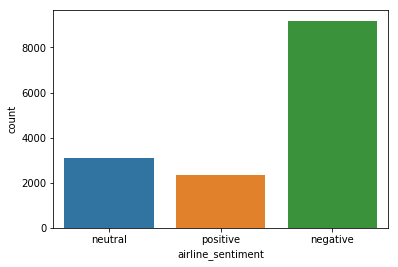

In [8]:
sns.countplot(x = 'airline_sentiment', data = Tweet)

In [9]:
Mood_count=Tweet['airline_sentiment'].value_counts()
Mood_count

negative    9178
neutral     3099
positive    2363
Name: airline_sentiment, dtype: int64

In [10]:
Tweet['airline'].value_counts()

United            3822
US Airways        2913
American          2759
Southwest         2420
Delta             2222
Virgin America     504
Name: airline, dtype: int64

In [11]:
def plot_sub_sentiment(Airline):
    df=Tweet[Tweet['airline']==Airline]
    count=df['airline_sentiment'].value_counts()
    Index = [1,2,3]
    plt.bar(Index,count)
    plt.xticks(Index,['negative','neutral','positive'])
    plt.ylabel('Mood Count')
    plt.xlabel('Mood')
    plt.title('Count of Moods of '+Airline)

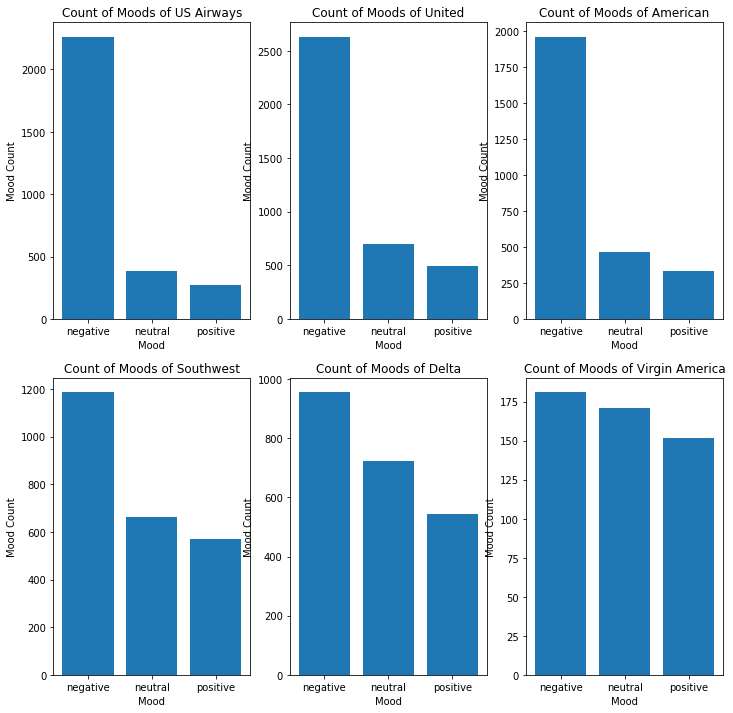

In [12]:
plt.figure(1,figsize=(12, 12))
plt.subplot(231)
plot_sub_sentiment('US Airways')
plt.subplot(232)
plot_sub_sentiment('United')
plt.subplot(233)
plot_sub_sentiment('American')
plt.subplot(234)
plot_sub_sentiment('Southwest')
plt.subplot(235)
plot_sub_sentiment('Delta')
plt.subplot(236)
plot_sub_sentiment('Virgin America')

From the above plots:
It is easy to realize that the distribution of moods for the first three airlines are always skewed toward negative moods quite a bit.
On the other hand, the moods are distributed more or well balanced with the later three airline companies. 

In [13]:
NR_Count=dict(Tweet['negativereason'].value_counts(sort=False))

In [14]:
print(NR_Count)

{'Damaged Luggage': 74, "Can't Tell": 1190, 'Flight Attendant Complaints': 481, 'Late Flight': 1665, 'Lost Luggage': 724, 'Customer Service Issue': 2910, 'longlines': 178, 'Cancelled Flight': 847, 'Bad Flight': 580, 'Flight Booking Problems': 529}


In [15]:
def NR_Count(Airline):
    # all airlines selected
    if Airline=='All':
        df=Tweet
    # select from Airlines
    else:
        df=Tweet[Tweet['airline']==Airline]
    # dictionary of negative reason 
    count=dict(df['negativereason'].value_counts())
    
    Unique_reason=list(Tweet['negativereason'].unique())
    Unique_reason=[x for x in Unique_reason if str(x) != 'nan']
    
    Reason_frame=pd.DataFrame({'Reasons':Unique_reason})
    Reason_frame['count']=Reason_frame['Reasons'].apply(lambda x: count[x])
    
    return Reason_frame

def plot_reason(Airline):
    df=NR_Count(Airline)
    count=df['count']
    Index = range(1,(len(df)+1))
    plt.bar(Index,count)
    plt.xticks(Index,df['Reasons'],rotation=90)
    plt.ylabel('Count')
    plt.xlabel('Reason')
    plt.title('Count of Reasons for '+Airline)

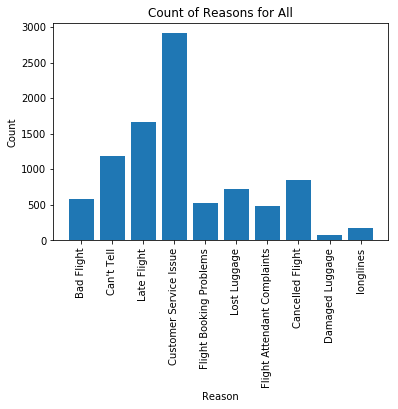

In [16]:
plot_reason('All')

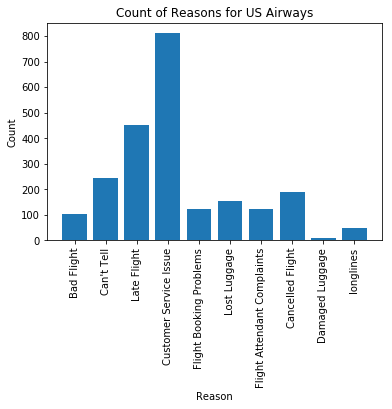

In [17]:
plot_reason('US Airways')

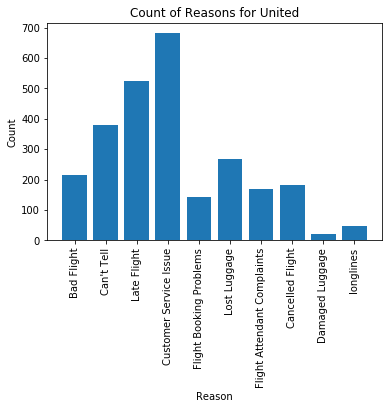

In [18]:
plot_reason('United')

### Word Cloud for the negative Tweets

In [19]:
from wordcloud import WordCloud,STOPWORDS

In [20]:
#negative rows selected
df=Tweet[Tweet['airline_sentiment']=='negative']
#combine all neg tweets 
words = ' '.join(df['text'])
#remove some words such as http and @ start with 
cleaned_neg_word = " ".join([word for word in words.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

In [21]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_neg_word)

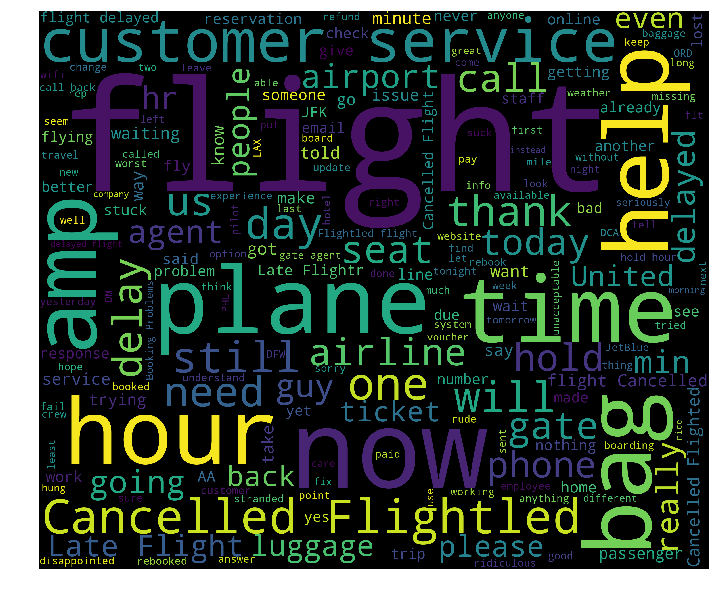

In [22]:
plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**We can find that the Tweets with negative moods are frequently involved some words like cancelled, flight ,customer or hour. People might guess that customer tends to complain when they are waiting for the delayed flights.**

In [23]:
#pos rows selected
df_pos=Tweet[Tweet['airline_sentiment']=='positive']
#combine all neg tweets 
words_pos = ' '.join(df_pos['text'])
#remove some words such as http and @ start with 
cleaned_pos_word = " ".join([word for word in words_pos.split()
                            if 'http' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

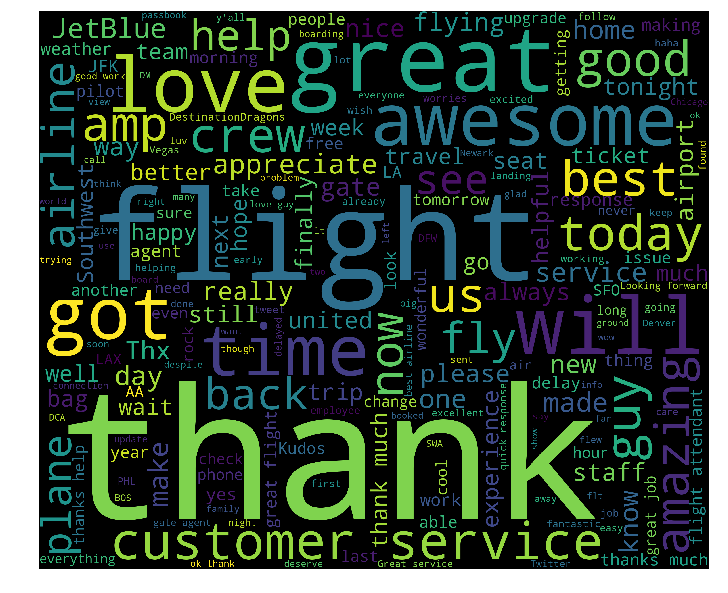

In [24]:
wordcloud = WordCloud(stopwords=STOPWORDS,
                      background_color='black',
                      width=3000,
                      height=2500
                     ).generate(cleaned_pos_word)


plt.figure(1,figsize=(12, 12))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

**Realized that positive review generally includes thank and all positive words such as best ,good , great ,awesome 

# Word2Vec implementation

### E: Preprocess data for classification

In [25]:
import re
import nltk
from nltk.corpus import stopwords
import string

In [26]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [27]:
Tweet['sentiment']=Tweet['airline_sentiment'].apply(lambda x: 0 if x=='negative' else 1)

In [28]:
def tweet_to_words(raw_tweet):
    #removed punctuation
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    #make it lower
    words = letters_only.lower().split()        
    #remove stop words
    stops = set(stopwords.words("english")) 
    meaningful_words = [w for w in words if not w in stops] 
    return( " ".join( meaningful_words )) 

def clean_tweet_length(raw_tweet):
    letters_only = re.sub("[^a-zA-Z]", " ",raw_tweet) 
    words = letters_only.lower().split()                             
    stops = set(stopwords.words("english"))                  
    meaningful_words = [w for w in words if not w in stops] 
    return(len( meaningful_words )) 

In [29]:
Tweet['clean_tweet']=Tweet['text'].apply(lambda x: tweet_to_words(x))
Tweet['Tweet_length']=Tweet['text'].apply(lambda x: clean_tweet_length(x))

In [30]:
Tweet.head()

,tweet_id,airline_sentiment,airline_sentiment_confidence,negativereason,negativereason_confidence,airline,airline_sentiment_gold,name,negativereason_gold,retweet_count,text,tweet_coord,tweet_created,tweet_location,user_timezone,sentiment,clean_tweet,Tweet_length
0,570306133677760513,neutral,1.0000,NaN,NaN,Virgin America,NaN,cairdin,NaN,0,@VirginAmerica What @dhepburn said.,NaN,2015-02-24 11:35:52 -0800,NaN,Eastern Time (US & Canada),1,virginamerica dhepburn said,3
1,570301130888122368,positive,0.3486,NaN,0.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica plus you've added commercials t...,NaN,2015-02-24 11:15:59 -0800,NaN,Pacific Time (US & Canada),1,virginamerica plus added commercials experienc...,6
2,570301083672813571,neutral,0.6837,NaN,NaN,Virgin America,NaN,yvonnalynn,NaN,0,@VirginAmerica I didn't today... Must mean I n...,NaN,2015-02-24 11:15:48 -0800,Lets Play,Central Time (US & Canada),1,virginamerica today must mean need take anothe...,8
3,570301031407624196,negative,1.0000,Bad Flight,0.7033,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica it's really aggressive to blast...,NaN,2015-02-24 11:15:36 -0800,NaN,Pacific Time (US & Canada),0,virginamerica really aggressive blast obnoxiou...,11
4,570300817074462722,negative,1.0000,Can't Tell,1.0000,Virgin America,NaN,jnardino,NaN,0,@VirginAmerica and it's a really big bad thing...,NaN,2015-02-24 11:14:45 -0800,NaN,Pacific Time (US & Canada),0,virginamerica really big bad thing,5


In [31]:
train,test = train_test_split(Tweet,test_size=0.2,random_state=42)

In [32]:
train_clean_tweet=[]
for tweet in train['clean_tweet']:
    train_clean_tweet.append(tweet)
test_clean_tweet=[]
for tweet in test['clean_tweet']:
    test_clean_tweet.append(tweet)

In [33]:
from sklearn.feature_extraction.text import CountVectorizer
v = CountVectorizer(analyzer = "word")
train_features= v.fit_transform(train_clean_tweet)
test_features=v.transform(test_clean_tweet)

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC, LinearSVC, NuSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.metrics import accuracy_score

In [35]:
Classifiers = [
    LogisticRegression(C=0.000000001,solver='liblinear',max_iter=200),
    KNeighborsClassifier(7),
    SVC(kernel="rbf", C=0.025, probability=True),
    DecisionTreeClassifier(),
    RandomForestClassifier(n_estimators=200),
    AdaBoostClassifier(),
    GaussianNB()]

In [36]:
dense_features=train_features.toarray()
dense_test= test_features.toarray()
Accuracy=[]
Model=[]
for classifier in Classifiers:
    try:
        fit = classifier.fit(train_features,train['sentiment'])
        pred = fit.predict(test_features)
    except Exception:
        fit = classifier.fit(dense_features,train['sentiment'])
        pred = fit.predict(dense_test)
    accuracy = accuracy_score(pred,test['sentiment'])
    Accuracy.append(accuracy)
    Model.append(classifier.__class__.__name__)
    print('Accuracy of '+classifier.__class__.__name__+'is '+str(accuracy))    

Accuracy of LogisticRegressionis 0.6451502732240437
Accuracy of KNeighborsClassifieris 0.5621584699453552


/opt/conda/lib/python3.6/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Accuracy of SVCis 0.6451502732240437
Accuracy of DecisionTreeClassifieris 0.7540983606557377
Accuracy of RandomForestClassifieris 0.8114754098360656
Accuracy of AdaBoostClassifieris 0.7855191256830601
Accuracy of GaussianNBis 0.5724043715846995


## Compare the model performances

Text(0.5, 1.0, 'Accuracies of Models')

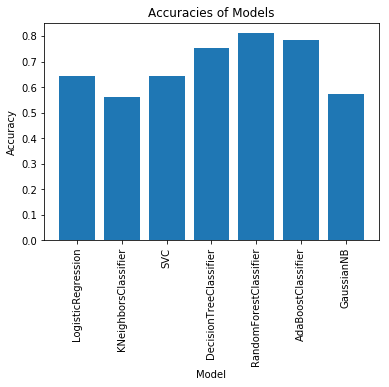

In [37]:
Index = [1,2,3,4,5,6,7]
plt.bar(Index,Accuracy)
plt.xticks(Index, Model,rotation=90)
plt.ylabel('Accuracy')
plt.xlabel('Model')
plt.title('Accuracies of Models')

## Deep learning implementation
Machine learning provided limited success to solving this challenge, so over to deep learning we head. The reason deep learning typically outperforms a bag of word models is the ability to capture the sequencial dependency between words in a sentence. This has been possible thanks to the invention of special neural network architectures called Recurrent Neural Networks.

Specifically in this kernel, I will be working with Long Short Term Memory networks or 'LSTM's' for short. These networks possess a memory that "remembers" previous data from the input and makes decisions based on that knowledge. These networks are more directly suited for written data inputs, since each word in a sentence has meaning based on the surrounding words (previous and upcoming words).

Before I can get my hands dirty with these networks, i'll need to import the required tools from the Keras package:

In [38]:
# Importing all required tools for deep learning from keras
from keras.preprocessing.text import Tokenizer
from keras.preprocessing.sequence import pad_sequences
from keras.layers import Dense, Input, LSTM, Embedding, Dropout, Activation, Conv1D, GRU, CuDNNGRU, CuDNNLSTM, BatchNormalization
from keras.layers import Bidirectional, GlobalMaxPool1D, MaxPooling1D, Add, Flatten
from keras.layers import GlobalAveragePooling1D, GlobalMaxPooling1D, concatenate, SpatialDropout1D
from keras.models import Model, load_model
from keras import initializers, regularizers, constraints, optimizers, layers, callbacks
from keras import backend as K
from keras.engine import InputSpec, Layer
from keras.optimizers import Adam

from keras.callbacks import ModelCheckpoint, TensorBoard, Callback, EarlyStopping

Using TensorFlow backend.
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/opt/conda/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarn

Before any words can be fed into the neural network, a series of processing steps are first required:

Tokenization - We need to break down the sentence into unique words. For eg, "I love cats and love dogs" will become ["I","love","cats","and","dogs"]
Indexing - We put the words in a dictionary-like structure and give them an index each For eg, {1:"I",2:"love",3:"cats",4:"and",5:"dogs"}
Index Representation- We could represent the sequence of words in the comments in the form of index, and feed this chain of index into the network (e.g. [1,2,3,4,2,5]).
The below code will complete each of these steps in turn:

In [39]:
full_text = list(train_clean_tweet) + list(test_clean_tweet)

print(full_text[0])

united offering us rooms people fail


In [40]:
# 1. Tokenization
tokenizer = Tokenizer(lower=True, filters='')
tokenizer.fit_on_texts(full_text)
# 2. Indexing
train_sequences = tokenizer.texts_to_sequences(train_clean_tweet)
test_sequences = tokenizer.texts_to_sequences(test_clean_tweet)

In [41]:
# 3. Index Representation
MAX_LENGTH = 50

padded_train_sequences = pad_sequences(train_sequences, maxlen=MAX_LENGTH)
padded_test_sequences = pad_sequences(test_sequences, maxlen=MAX_LENGTH)
padded_train_sequences

array([[   0,    0,    0, ..., 1556,   71,  248],
       [   0,    0,    0, ..., 1071,  115, 4236],
       [   0,    0,    0, ...,  179,  951,  986],
       ...,
       [   0,    0,    0, ...,  330,   95,   13],
       [   0,    0,    0, ...,   26,  139, 1241],
       [   0,    0,    0, ...,   16, 1179,  745]], dtype=int32)

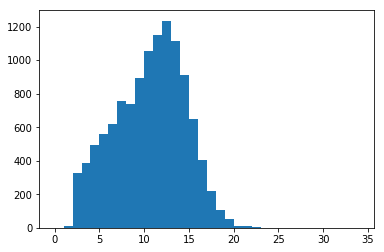

In [42]:
import numpy as np
# Find and plot total word count per sentence
totalNumWords = [len(one_comment) for one_comment in train_sequences]

plt.hist(totalNumWords,bins = np.arange(0,35,1))
plt.show()

## LSTM-CNN Model
Now onto the model! This CNN-LSTM model consists of an initial LSTM layer which will receive word embeddings for each token in the review as inputs. The intuition is that its output tokens will store information not only of the initial token, but also any previous tokens; In other words, the LSTM layer is generating a new encoding for the original input. The output of the LSTM layer is then fed into a convolution layer which we expect will extract local features. Finally the convolution layer’s output will be pooled to a smaller dimension and ultimately outputted as either a positive or negative label.

I must credit the following source which introduces the idea of LSTM-CNN Model for Sentiment Analysis. I encourage you to take a read! - http://konukoii.com/blog/2018/02/19/twitter-sentiment-analysis-using-combined-lstm-cnn-models/

# Embeddings

In [43]:
from bs4 import BeautifulSoup 
# word2vec expects a list of lists.
# Using punkt tokenizer for better splitting of a paragraph into sentences.

import nltk.data
#nltk.download('popular')

tokenizer = nltk.data.load('tokenizers/punkt/english.pickle')

# This function converts a text to a sequence of words.
def review_wordlist(review, remove_stopwords=False):
    # 1. Removing html tags
    review_text = BeautifulSoup(review).get_text()
    # 2. Removing non-letter.
    review_text = re.sub("[^a-zA-Z]"," ",review_text)
    # 3. Converting to lower case and splitting
    words = review_text.lower().split()
    # 4. Optionally remove stopwords
    if remove_stopwords:
        stops = set(stopwords.words("english"))     
        words = [w for w in words if not w in stops]
    
    return(words)

# This function splits a review into sentences
def review_sentences(review, tokenizer, remove_stopwords=False):
    # 1. Using nltk tokenizer
    raw_sentences = tokenizer.tokenize(review.strip())
    sentences = []
    # 2. Loop for each sentence
    for raw_sentence in raw_sentences:
        if len(raw_sentence)>0:
            sentences.append(review_wordlist(raw_sentence,\
                                            remove_stopwords))

    # This returns the list of lists
    return sentences

sentences = []
test_sentence = []
full_text = []
print("Parsing sentences from training set")
for review in train["text"]:
    sentences += review_sentences(review, tokenizer)

for review in test["text"]:
    test_sentence += review_sentences(review, tokenizer)

for review in Tweet["text"]:
    full_text += review_sentences(review, tokenizer)
    
# Creating the model and setting values for the various parameters
num_features = 300  # Word vector dimensionality
min_word_count = 40 # Minimum word count
num_workers = 4     # Number of parallel threads
context = 10        # Context window size
downsampling = 1e-3 # (0.001) Downsample setting for frequent words

# Initializing the train model
from gensim.models import word2vec
print("Training model for embedings....")
W2v_model = word2vec.Word2Vec(full_text,\
                          workers=num_workers,\
                          size=num_features,\
                          min_count=min_word_count,\
                          window=context,
                          sample=downsampling)

# To make the model memory efficient
W2v_model.init_sims(replace=True)

# Saving the model for later use. Can be loaded using Word2Vec.load()
print("Saving the model......")
W2vmodel_name = "300features_40minwords_10context"
W2v_model.save(W2vmodel_name)

Parsing sentences from training set


/opt/conda/lib/python3.6/site-packages/bs4/__init__.py:357: UserWarning: "http://t.co/thS10LDY2a" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/opt/conda/lib/python3.6/site-packages/bs4/__init__.py:294: UserWarning: "b'.'" looks like a filename, not markup. You should probably open this file and pass the filehandle into Beautiful Soup.
  ' Beautiful Soup.' % markup)
/opt/conda/lib/python3.6/site-packages/bs4/__init__.py:357: UserWarning: "http://t.co/lsxJI0oUvR”" looks like a URL. Beautiful Soup is not an HTTP client. You should probably use an HTTP client like requests to get the document behind the URL, and feed that document to Beautiful Soup.
  ' that document to Beautiful Soup.' % decoded_markup
/opt/conda/lib/python3.6/site-packages/bs4/__init__.py:357: UserWarning: "http://t.co/Lug4MFV

Training model for embedings....
Saving the model......


In [44]:
# Few tests: This will print the odd word among them 
W2v_model.wv.doesnt_match("man dog america thank".split())

/opt/conda/lib/python3.6/site-packages/gensim/models/keyedvectors.py:877: FutureWarning: arrays to stack must be passed as a "sequence" type such as list or tuple. Support for non-sequence iterables such as generators is deprecated as of NumPy 1.16 and will raise an error in the future.
  vectors = vstack(self.word_vec(word, use_norm=True) for word in used_words).astype(REAL)


'thank'

In [45]:
print("Number of word vectors: {}".format(len(W2v_model.wv.vocab)))

Number of word vectors: 720


In [46]:
word_vectors = W2v_model.wv

In [47]:
W2v_model.wv.most_similar_cosmul(positive=['after', 'flight'], negative=['early'])

[('flighted', 0.9741697907447815),
 ('delayed', 0.9666783213615417),
 ('late', 0.9659865498542786),
 ('flightled', 0.959509015083313),
 ('due', 0.9349063634872437),
 ('tomorrow', 0.93206387758255),
 ('then', 0.9292928576469421),
 ('hours', 0.9189302325248718),
 ('flightr', 0.9180907011032104),
 ('got', 0.9130720496177673)]

## Deeplearning implementation

In [48]:
MAX_NB_WORDS = len(word_vectors.vocab)
MAX_SEQUENCE_LENGTH = 200